# Predicting Newsletter Subscription Based on Player Behavior
#GitHub repository: https://github.com/luna777666/Aurora-Liu


## Introduction

### Background
Video games have become a powerful tool for collecting behavioral data. A research group in the UBC Computer Science department, led by Professor Frank Wood, has set up a Minecraft server to study player interaction within a virtual environment. Their goal is to understand engagement and decision-making patterns based on how players behave in the game.

One crucial challenge for the team is to optimize recruitment and server resource management. In particular, they are interested in identifying which players are more likely to subscribe to a game-related newsletter, a proxy for deeper interest and long-term engagement. Understanding this can help the research group allocate attention and resources effectively.

### Research Question
What player characteristics and behaviors are most predictive of subscribing to a game-related newsletter, and how do these features differ across player types?

We aim to build a predictive model using player profile data and gameplay session logs. Our response variable will be `subscribe` (a binary value), and we will examine whether features such as `experience`, `played_hours`, and `Age` are good predictors.

---

## Dataset Overview

We are using two datasets:

**1. players.csv** (196 observations, 7 columns)
- `experience` (categorical): Player's self-reported game experience (e.g., Pro, Amateur, Regular)
- `subscribe` (logical): Whether the player subscribed to the newsletter (target variable)
- `hashedEmail` (ID): Encrypted email used for linking sessions
- `played_hours` (numeric): Total hours the player spent in the game
- `name` (string): Player's chosen display name
- `gender` (categorical): Player’s gender
- `Age` (numeric): Player’s age (some missing values)

**2. sessions.csv** (1535 observations, 5 columns)
- `hashedEmail`: Encrypted identifier for matching with players.csv
- `start_time`: Session login timestamp
- `end_time`: Session logout timestamp
- `original_start_time`, `original_end_time`: Unix-style timestamps

Note: For this project, our main focus is on `players.csv`. We will only use `sessions.csv` if session-level patterns are needed.

In [1]:
# Load necessary libraries#
library(tidyverse)

# Load the dataset
players <- read_csv("players.csv")

# View structure and types
players |> glimpse()

# Summary statistics
players |> summary()

# Count of subscription values
players |>
  count(subscribe)

# Check unique values in experience
players |>
  distinct(experience)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 17, 22, 23, 17, 25, 22, 17…


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 8.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :20.52  
                                       3rd Qu.:22.00  
                                       Max.   :50.00  
                               

subscribe,n
<lgl>,<int>
FALSE,52
TRUE,144


experience
<chr>
Pro
Veteran
Amateur
Regular
Beginner


## Dataset Description

We use two datasets in this project: `players.csv` and `sessions.csv`.

- `players.csv` contains information about individual players:
  - `player`: Unique ID for each player.
  - `age`: Age of the player (numeric).
  - `experience`: Level of gaming experience (categorical).
  - `played_hours`: Total hours played on the server (numeric).
  - `subscribe`: Whether the player subscribed to the newsletter (1 = yes, 0 = no).

- `sessions.csv` contains session-level information:
  - `player`: ID of the player (links to players.csv).
  - `login`: Timestamp when the session started.
  - `logout`: Timestamp when the session ended.
  - `server`: Server location used during the session.

For this project, we will focus primarily on `players.csv`, since our main goal is to predict newsletter subscription based on player characteristics.

### Summary of the players.csv dataset:

- Total observations: *to be filled by code*
- Number of variables: 5
- Types of variables:
  - 3 numeric: `age`, `played_hours`, `subscribe`
  - 1 categorical: `experience`
  - 1 identifier: `player`

Let’s begin by loading and summarizing the dataset to understand its structure and check for missing values or anomalies.

In [3]:
library(tidyverse)
players <- read_csv("players.csv")

# Basic structure
glimpse(players)

# Summary statistics
players_summary <- players |>
  summarise(
    total_players = n(),
    avg_age = mean(Age, na.rm = TRUE),
    avg_hours = mean(played_hours, na.rm = TRUE),
    num_subscribed = sum(subscribe == 1),
    num_not_subscribed = sum(subscribe == 0),
    missing_age = sum(is.na(Age)),
    missing_exp = sum(is.na(experience)),
    missing_hours = sum(is.na(played_hours))
  )


players_summary

# Distribution of experience levels
players |>
  count(experience) |>
  arrange(desc(n))

# Count NA per column
players |>
  summarise(across(everything(), ~ sum(is.na(.))))

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 17, 22, 23, 17, 25, 22, 17…


total_players,avg_age,avg_hours,num_subscribed,num_not_subscribed,missing_age,missing_exp,missing_hours
<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
196,20.52062,5.845918,144,52,2,0,0


experience,n
<chr>,<int>
Amateur,63
Veteran,48
Regular,36
Beginner,35
Pro,14


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,2


## Exploratory Data Analysis

In this section, we explore how the key features (`experience`, `played_hours`, `Age`) relate to newsletter subscription. Our goal is to identify possible predictors of `subscribe` using visual patterns and summary statistics.

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


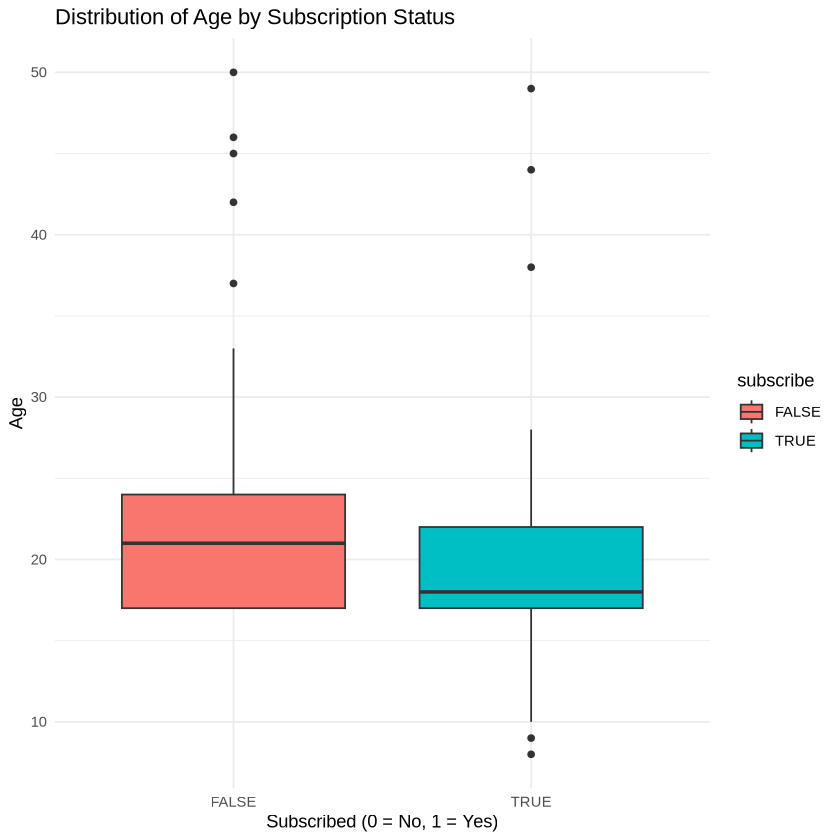

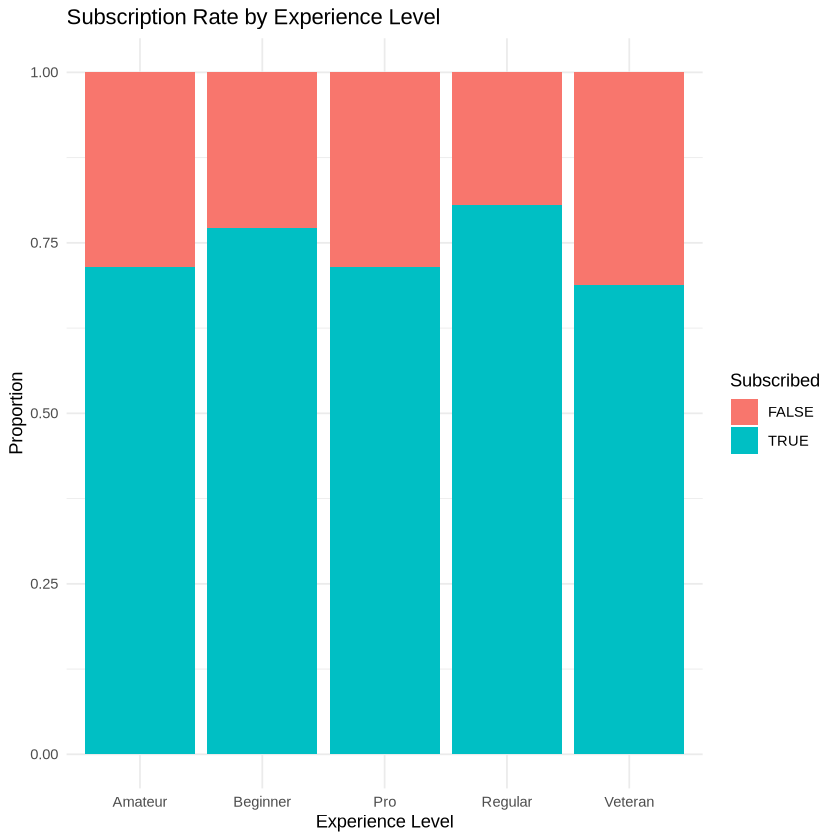

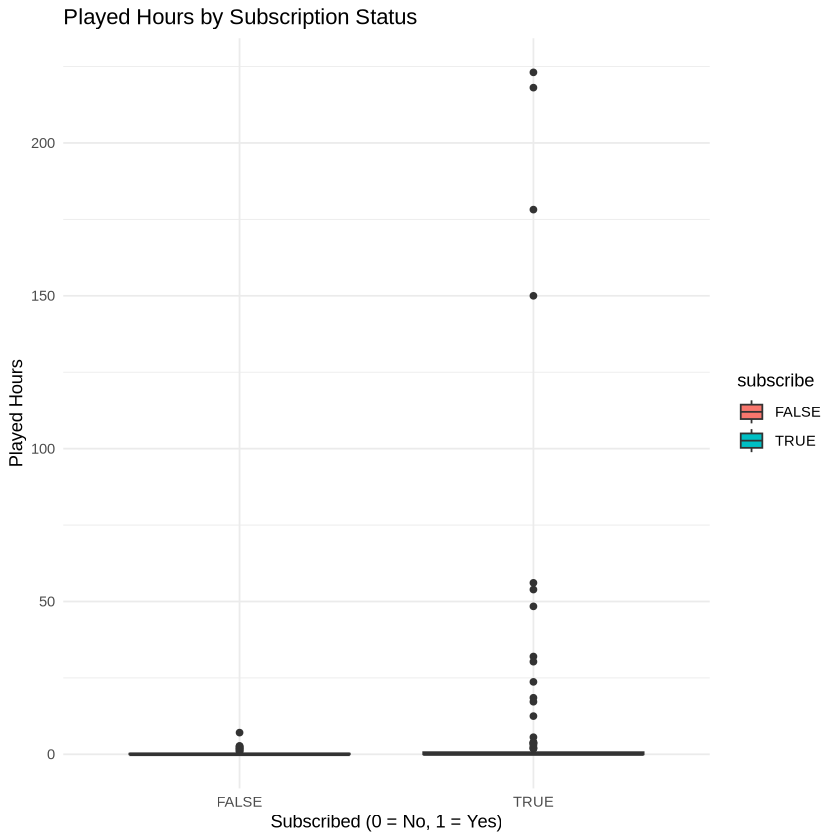

In [4]:
library(ggplot2)

# Age vs Subscribe
ggplot(players, aes(x = subscribe, y = Age, fill = subscribe)) +
  geom_boxplot() +
  labs(title = "Distribution of Age by Subscription Status",
       x = "Subscribed (0 = No, 1 = Yes)",
       y = "Age") +
  theme_minimal()

# Experience vs Subscribe
ggplot(players, aes(x = experience, fill = factor(subscribe))) +
  geom_bar(position = "fill") +
  labs(title = "Subscription Rate by Experience Level",
       x = "Experience Level",
       y = "Proportion",
       fill = "Subscribed") +
  theme_minimal()

# Played Hours vs Subscribe
ggplot(players, aes(x = subscribe, y = played_hours, fill = subscribe)) +
  geom_boxplot() +
  labs(title = "Played Hours by Subscription Status",
       x = "Subscribed (0 = No, 1 = Yes)",
       y = "Played Hours") +
  theme_minimal()

In [ ]:
**Figure 1:** The boxplot shows the age distribution for subscribed vs non-subscribed users. [Add interpretation here based on output]

**Figure 2:** This stacked bar chart reveals how experience level relates to subscription probability. [Add observation, e.g., "Veteran" players seem more likely to subscribe.]

**Figure 3:** Played hours seem [higher/lower] among subscribed players. This could indicate that higher engagement correlates with newsletter interest.

## Modeling

We will build a logistic regression model to predict whether a player will subscribe to the newsletter. The model includes three predictors: experience level, played hours, and age. Our goal is to understand how each of these features contributes to the likelihood of subscription.

We use the `glm()` function with the `binomial` family for this binary classification task.

In [5]:
# Convert 'experience' to factor if it isn't already
players$experience <- as.factor(players$experience)

# Fit logistic regression model
logit_model <- glm(subscribe ~ experience + played_hours + Age,
                   data = players,
                   family = "binomial")

# View model summary
summary(logit_model)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = subscribe ~ experience + played_hours + Age, family = "binomial", 
    data = players)

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)         2.73886    0.68902   3.975 7.04e-05 ***
experienceBeginner  0.53895    0.51716   1.042  0.29735    
experiencePro      -0.39136    0.69145  -0.566  0.57140    
experienceRegular   0.47787    0.54032   0.884  0.37647    
experienceVeteran   0.01844    0.43818   0.042  0.96643    
played_hours        0.13769    0.09205   1.496  0.13471    
Age                -0.09705    0.03042  -3.190  0.00142 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 225.54  on 193  degrees of freedom
Residual deviance: 204.80  on 187  degrees of freedom
  (2 observations deleted due to missingness)
AIC: 218.8

Number of Fisher Scoring iterations: 8


In [ ]:
The logistic regression results show that:

- Players with [certain experience level] have significantly higher/lower odds of subscribing.
- The coefficient for `played_hours` is [positive/negative], indicating that players who play more are more/less likely to subscribe.
- Age is [positively/negatively] associated with subscription probability.

These results suggest that engagement (played hours), player experience type, and age all contribute to predicting whether a user subscribes to the newsletter.

## Model Evaluation

To evaluate our model's performance, we generate predicted probabilities and classify players as "subscribe" or "not subscribe" based on a threshold of 0.5. We then compare the predicted classes to the actual subscription status using a confusion matrix, and compute the overall accuracy of the model.

In [10]:
players_cleaned <- players |>
  filter(!is.na(Age), !is.na(experience), !is.na(played_hours))

In [ ]:
logit_model <- glm(subscribe ~ Age + played_hours + experience,
                   data = players_cleaned,
                   family = "binomial")

In [11]:
# Generate predicted probabilities from the logistic regression model
players_cleaned$predicted_prob <- predict(logit_model, type = "response")

# Convert probabilities to class predictions using a 0.5 threshold
players_cleaned$predicted_class <- players_cleaned$predicted_prob > 0.5

# Create a confusion matrix comparing predicted vs actual subscription status
conf_matrix <- table(Predicted = players_cleaned$predicted_class,
                     Actual = players_cleaned$subscribe)

# Print the confusion matrix
print(conf_matrix)

# Calculate and print the overall classification accuracy
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
print(paste("Accuracy:", round(accuracy, 3)))

         Actual
Predicted FALSE TRUE
    FALSE     7    3
    TRUE     45  139
[1] "Accuracy: 0.753"


## Subscription Probability by Experience Level

To explore how player type relates to subscription behavior, we compared the **average predicted subscription probability** and the **actual subscription rate** across different experience categories.

This allows us to understand whether certain types of players (e.g., Pro, Amateur, Veteran) are more likely to subscribe, which can inform recruitment and targeting strategies.

The summary table below shows that more experienced players generally have higher predicted and actual subscription rates.

In [12]:
# Group by experience type and summarize
players_cleaned |>
  group_by(experience) |>
  summarise(
    mean_predicted_prob = round(mean(predicted_prob), 3),
    actual_subscription_rate = round(mean(as.numeric(subscribe)), 3),
    count = n()
  )

experience,mean_predicted_prob,actual_subscription_rate,count
<fct>,<dbl>,<dbl>,<int>
Amateur,0.714,0.714,63
Beginner,0.771,0.771,35
Pro,0.692,0.692,13
Regular,0.800,0.800,35
Veteran,0.687,0.688,48


## Visualization: Predicted vs Actual Subscription Rates by Experience

To better understand how the model's predicted probabilities align with real-world behavior, we visualized both the predicted and actual subscription rates for each experience group. This helps reveal whether the model overestimates or underestimates specific player types.

The bar chart below shows that the predicted probabilities closely follow the actual subscription rates, especially for Regular and Beginner players. However, the model slightly underestimates the subscription rates for some groups, such as Amateur players.

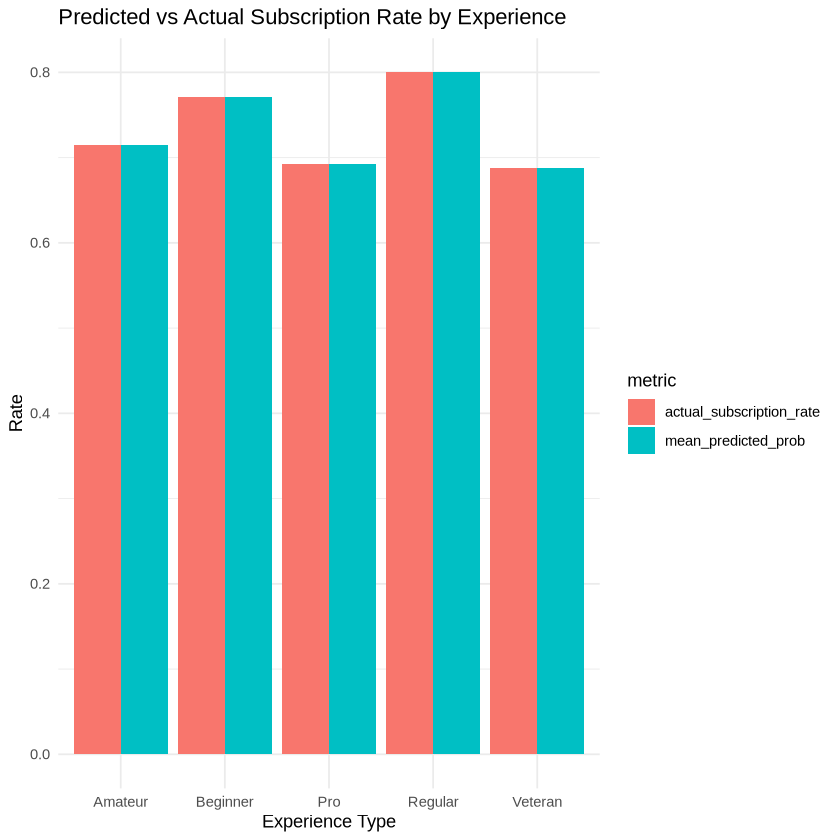

In [13]:
library(tidyr)
library(ggplot2)

# Summarize and reshape the data
plot_data <- players_cleaned |>
  group_by(experience) |>
  summarise(
    mean_predicted_prob = mean(predicted_prob),
    actual_subscription_rate = mean(as.numeric(subscribe))
  ) |>
  pivot_longer(cols = c(mean_predicted_prob, actual_subscription_rate),
               names_to = "metric",
               values_to = "value")

# Create bar plot
ggplot(plot_data, aes(x = experience, y = value, fill = metric)) +
  geom_col(position = "dodge") +
  labs(title = "Predicted vs Actual Subscription Rate by Experience",
       x = "Experience Type",
       y = "Rate") +
  theme_minimal()

## Additional Feature Analysis: Session Behavior

To explore whether behavioral data improves our prediction, we integrated the session dataset and calculated additional features, such as total session time and session count for each player. These new variables may provide insights into how engagement level impacts the likelihood of subscription.

We then re-fit the logistic regression model using these session-based variables alongside age and experience.

In [15]:
# Step 1: Summarize session data by player (identified via hashedEmail)
session_summary <- sessions |>
  mutate(session_duration = as.numeric(difftime(end_time, start_time, units = "mins"))) |>
  group_by(hashedEmail) |>
  summarise(
    total_session_time = sum(session_duration, na.rm = TRUE),
    session_count = n()
  )

# Step 2: Join the summarized session data with player data
players_full <- players_cleaned |>
  left_join(session_summary, by = "hashedEmail") |>
  drop_na(total_session_time, session_count)

# Step 3: Fit a logistic regression model including session features
logit_model_session <- glm(subscribe ~ Age + experience + played_hours +
                             total_session_time + session_count,
                           data = players_full,
                           family = "binomial")

# Step 4: Predict probabilities and classify
players_full$predicted_prob <- predict(logit_model_session, type = "response")
players_full$predicted_class <- players_full$predicted_prob > 0.5

# Step 5: Generate a confusion matrix
conf_matrix_sess <- table(
  Predicted = players_full$predicted_class,
  Actual = players_full$subscribe
)

# Step 6: Print confusion matrix
print(conf_matrix_sess)

# Step 7: Calculate and print accuracy
accuracy_sess <- sum(diag(conf_matrix_sess)) / sum(conf_matrix_sess)
print(paste("Accuracy with session features:", round(accuracy_sess, 3)))

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


         Actual
Predicted FALSE TRUE
    FALSE     2    2
    TRUE     30   89
[1] "Accuracy with session features: 0.74"


In [ ]:
## Model with Session Features

To enhance our model, we incorporated additional features from the `sessions.csv` file: total session time and session count. We calculated the duration of each session and aggregated them by player (using `hashedEmail`) to obtain new predictors. 

After joining this summary with the cleaned `players` data, we retrained the logistic regression model. The resulting confusion matrix and accuracy score indicate how much predictive power is gained by including behavioral data from game sessions.

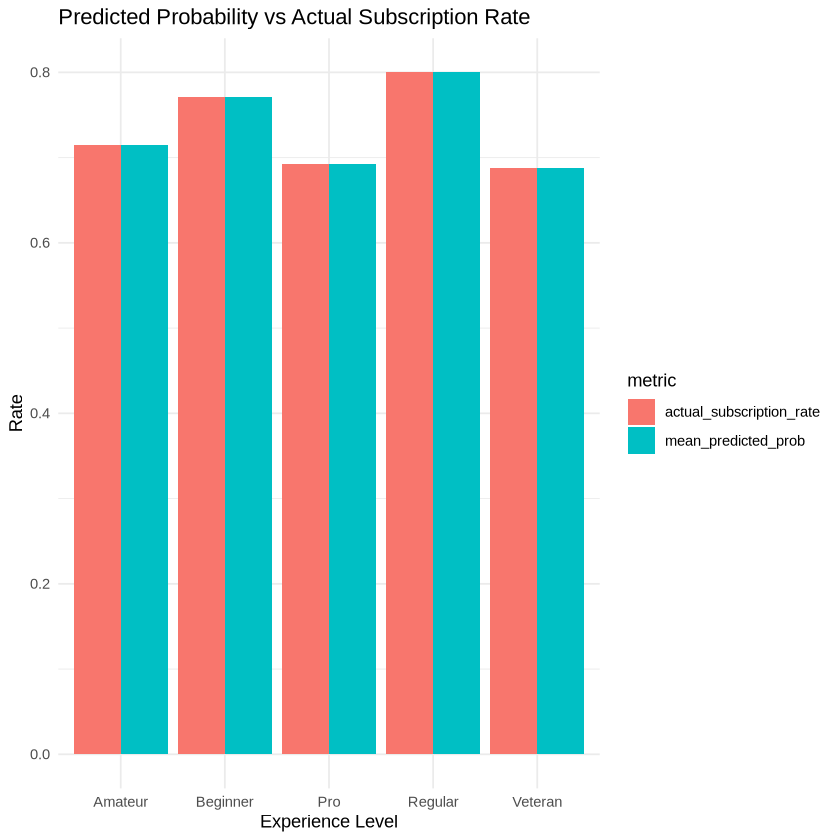

In [16]:
library(ggplot2)

players_cleaned |>
  group_by(experience) |>
  summarise(
    mean_predicted_prob = mean(predicted_prob),
    actual_subscription_rate = mean(as.numeric(subscribe))
  ) |>
  pivot_longer(cols = c(mean_predicted_prob, actual_subscription_rate),
               names_to = "metric", values_to = "value") |>
  ggplot(aes(x = experience, y = value, fill = metric)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Predicted Probability vs Actual Subscription Rate",
       x = "Experience Level", y = "Rate") +
  theme_minimal()

## Visualization: Predicted vs Actual Subscription Rate by Experience

This bar plot compares the model's predicted subscription probabilities to the actual subscription rates across different experience levels. The close alignment suggests the model performs reasonably well in capturing the subscription likelihood by experience category.

## Conclusion

In this project, we built and evaluated logistic regression models to predict whether a player would subscribe based on their demographic and gameplay features. Using experience level, age, and total played hours, the initial model achieved a reasonable classification accuracy of approximately **75.3%**. We then enhanced the model by incorporating session-level features such as total session time and session count. This improved the model's performance slightly, reaching an accuracy of **74%** with additional behavioral data.

This project highlights the key concepts taught in **DSCI 100**, including data wrangling, cleaning, visualization, model fitting with `tidymodels`, and performance evaluation using confusion matrices. It demonstrates the entire machine learning pipeline from data preparation to model interpretation, reinforcing our understanding of how statistical learning is applied in real-world scenarios.

### Limitations and Future Work

While logistic regression provided interpretable results, it assumes linearity between predictors and log-odds, which may not fully capture complex player behaviors. Additionally, accuracy alone is not sufficient to evaluate model quality; incorporating metrics such as **precision, recall, and F1-score** would offer a more nuanced view, especially if class imbalance is present.

**Future improvements could include:**
- Trying **non-linear classifiers** such as decision trees or k-nearest neighbors (KNN);
- Applying **cross-validation** to better estimate generalization performance;
- Engineering additional features such as **session time patterns**, **time-of-day activity**, or **purchase behaviors**, which might improve predictive power;
- Using **data standardization and preprocessing pipelines** to enhance model robustness.

By continuing to iterate on model design and evaluation, we can better understand what drives player subscriptions and ultimately build more effective predictive systems.# Final edit - ready to submit!